In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('MIDMARKS.xlsx',sheet_name='SEM2 MID 1 - ALPHA')
df.head()

,S.NO,SECTION,DV,M-II,PP,BEEE,FL,FIMS
0,1.0,ALPHA,12,0,17,9,19,15
1,2.0,ALPHA,19,12,16,16,18,3
2,3.0,ALPHA,18,14,18,18,18,16
3,4.0,ALPHA,15,9,19,17,19,15
4,5.0,ALPHA,18,17,19,19,20,18


#### printing the head of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S.NO     601 non-null    float64
 1   SECTION  691 non-null    object 
 2   DV       716 non-null    object 
 3   M-II     716 non-null    object 
 4   PP       716 non-null    object 
 5   BEEE     716 non-null    object 
 6   FL       715 non-null    object 
 7   FIMS     716 non-null    object 
dtypes: float64(1), object(7)
memory usage: 45.0+ KB


#### Total Entries: 718
#### Total Columns: 8
#### Float64 Dtype(1): S.No 
#### Object Dtype(7): DV,PP,FIMS,FL,BEEE,M-II

In [4]:
df.shape

(718, 8)

#### shape returns 718(rows )x 8(Columns)

Missing Values: 
S.NO       117
SECTION     27
DV           2
M-II         2
PP           2
BEEE         2
FL           3
FIMS         2
dtype: int64


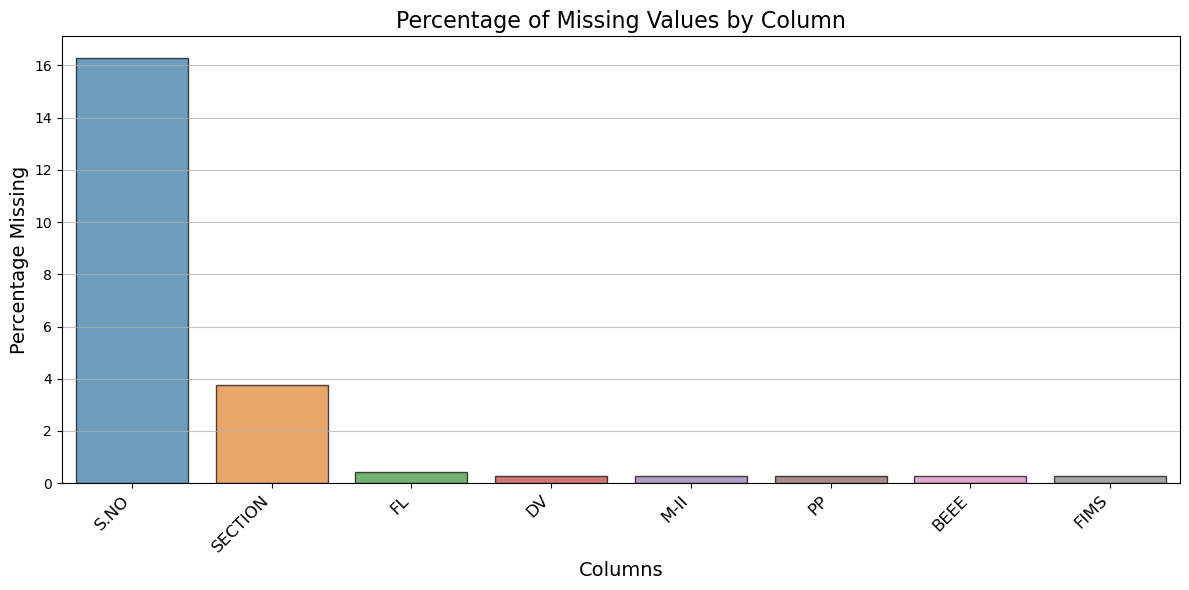

In [5]:
null_values = df.isnull().sum()

null_value_percentage = (null_values/ len(df)) * 100

print("Missing Values: ")
print(null_values)

null_values_df = pd.DataFrame({
    'Missing Values': null_values,
    'Percentage Missing': null_value_percentage
}).sort_values(by='Percentage Missing', ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(x=null_values_df.index, y='Percentage Missing', data=null_values_df, edgecolor='black', alpha=0.7)
sns.set_palette('Blues_r')
plt.title('Percentage of Missing Values by Column', fontsize=16)
plt.xlabel('Columns', fontsize=14)
plt.ylabel('Percentage Missing', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

### The plot shows the percentage of missing values by column, with SNO having the highest number of NaN values and Section having the second highest number of Nan values. It means incomplete data in critical columns, which could affect subsequent analysis if not properly handled.

In [6]:
df.PP.value_counts()

20    106
19     50
17     47
11     46
14     44
15     44
18     43
12     41
9      38
16     36
5      27
10     26
6      25
8      24
7      24
13     20
2      17
3      16
4      13
A      11
1       9
0       5
AB      3
MP      1
Name: PP, dtype: int64

### The column PP have the numeric values and three categorical string values of 'A' or 'AB' means Absent and 'MP' means Malpractice . It indicate the dataset columns are mixed with both numeric and three stirng values. It  may causes issue will numeric analysis

DV    1
PP    1
dtype: int64


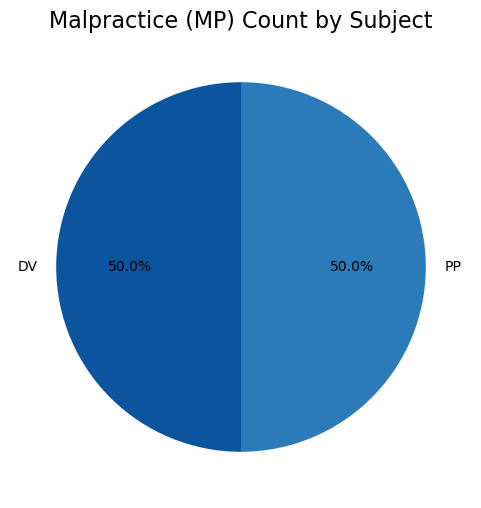

In [7]:
subjects = ['DV', 'BEEE', 'FL', 'FIMS', 'M-II', 'PP']
mp_counts = df[subjects].apply(lambda x: (x == 'MP').sum(), axis=0)
mp_counts = mp_counts[mp_counts > 0]
print(mp_counts)
plt.figure(figsize=(6, 6))
plt.pie(mp_counts, labels=mp_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Malpractice (MP) Count by Subject', fontsize=16)
plt.show()

### Subject-wise count of MP.
### You can see that MP only occurs in the DV and PP columns (subjects)

DV      10
BEEE    19
FL      13
FIMS     9
M-II     5
PP      11
dtype: int64


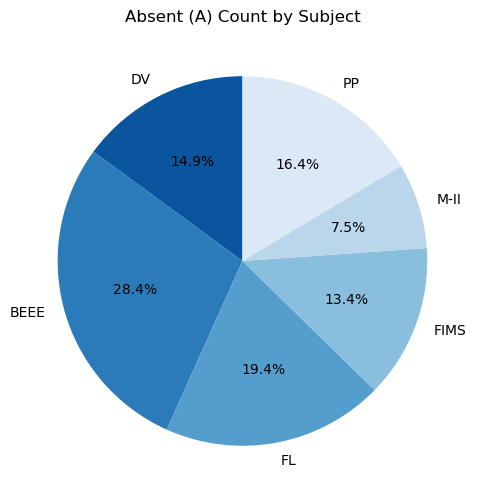

In [8]:
subjects = ['DV', 'BEEE', 'FL', 'FIMS', 'M-II', 'PP']
a_counts = df[subjects].apply(lambda x: (x == 'A').sum(), axis=0)
a_counts = a_counts[a_counts > 0]
print(a_counts)
plt.figure(figsize=(6,6))
plt.pie(a_counts, labels=a_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Absent (A) Count by Subject')
plt.show()

### Subject-wise count of A.
### You can see that BEEE subject has the highest occurence of A (28.4%)and M-II has least occurence of A(7.5%).

FIMS    13
M-II     7
PP       3
dtype: int64


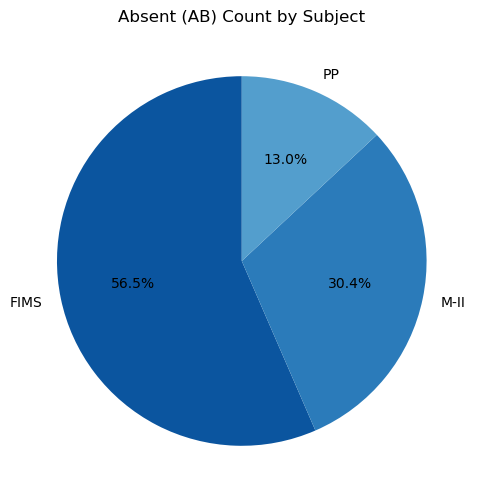

In [9]:
subjects = ['DV', 'BEEE', 'FL', 'FIMS', 'M-II', 'PP']
ab_counts = df[subjects].apply(lambda x: (x == 'AB').sum(), axis=0)
ab_counts = ab_counts[ab_counts > 0]
print(ab_counts)
plt.figure(figsize=(6,6))
plt.pie(ab_counts, labels=ab_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Absent (AB) Count by Subject')
plt.show()

### Subject-wise count of AB.
### You can see that FIMS subject has the highest occurence of AB (56.5%)and PP has least occurence of AB(13%).

In [10]:
df.isnull().sum()

S.NO       117
SECTION     27
DV           2
M-II         2
PP           2
BEEE         2
FL           3
FIMS         2
dtype: int64

In [11]:
columns=['DV', 'M-II', 'PP', 'BEEE', 'FL', 'FIMS']
df[columns]=df[columns].replace({'MP': 0, 'A': 0, 'AB': 0})
df[columns]=df[columns].fillna(0)

convert_dtype={
'DV':int,'M-II':int,'PP':int,'BEEE':int,'FL':int,'FIMS':int,
}
df=df.astype(convert_dtype)

### Replacing the string values ('MP', 'A', 'AB') with 0 for numerical operations, filling null values with 0, and converting the subject columns data type from object to int

In [12]:
subjects = ['DV', 'BEEE', 'FL', 'FIMS', 'M-II', 'PP']
mp_counts = df[subjects].apply(lambda x: (x == 'MP').sum(), axis=0)
mp_counts = mp_counts[mp_counts > 0]
print(mp_counts)

Series([], dtype: int64)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S.NO     601 non-null    float64
 1   SECTION  691 non-null    object 
 2   DV       718 non-null    int32  
 3   M-II     718 non-null    int32  
 4   PP       718 non-null    int32  
 5   BEEE     718 non-null    int32  
 6   FL       718 non-null    int32  
 7   FIMS     718 non-null    int32  
dtypes: float64(1), int32(6), object(1)
memory usage: 28.2+ KB


In [14]:
df.isnull().sum()

S.NO       117
SECTION     27
DV           0
M-II         0
PP           0
BEEE         0
FL           0
FIMS         0
dtype: int64

### We successfully replace the string values with 0, fill the null values with 0 and dtype from object to int

In [15]:
df.dropna(subset=['SECTION'],inplace=True)
df.isnull().sum()

S.NO       90
SECTION     0
DV          0
M-II        0
PP          0
BEEE        0
FL          0
FIMS        0
dtype: int64

### Since the SECTION column is a crtical column  which has 27 missing values. So, Dropping the rows with null values in SECTION

Counts for each section:
ALPHA      90
BETA       90
DELTA      90
GAMMA      90
OMEGA      90
ZETA       90
EPSILON    88
SIGMA      63
Name: SECTION, dtype: int64


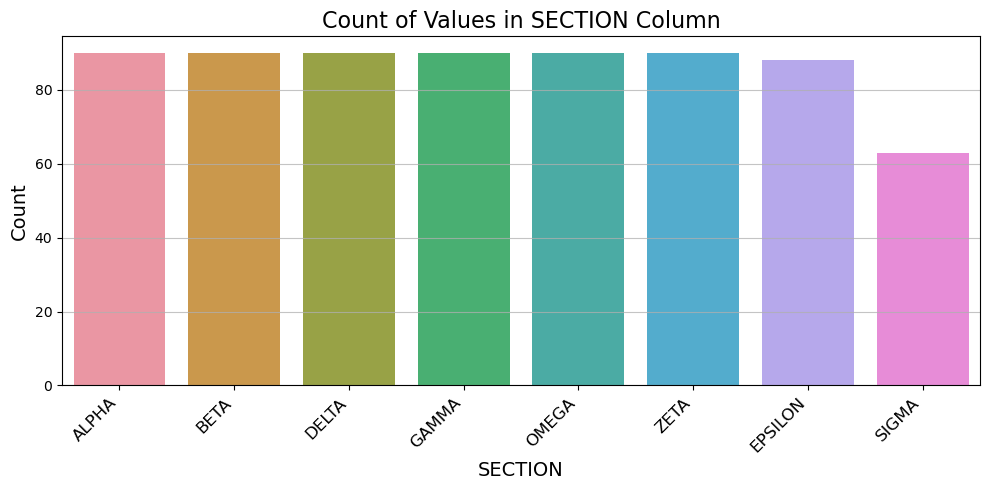

In [16]:
section_counts = df['SECTION'].value_counts()

print("Counts for each section:")
print(section_counts)

plt.figure(figsize=(10, 5))
sns.barplot(x=section_counts.index, y=section_counts.values)
sns.set_palette('Blues_r')

plt.title('Count of Values in SECTION Column', fontsize=16)
plt.xlabel('SECTION', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

### The count for each section represents the number of students enrolled in that section.

0       72
1       84
2      102
3       94
4      111
      ... 
713     89
714     58
715     86
716     53
717    105
Name: Total, Length: 691, dtype: int32


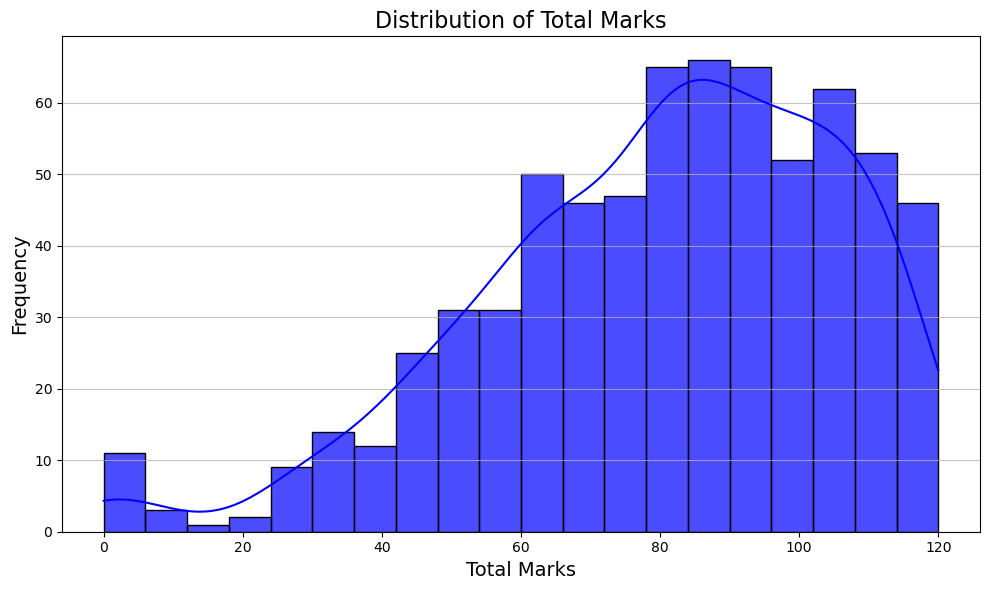

In [17]:
df['Total'] = df['DV'] + df['BEEE'] + df['FL'] + df['FIMS'] + df['PP'] + df['M-II']
print(df['Total'])
plt.figure(figsize=(10, 6))
sns.histplot(df['Total'], kde=True, color='blue', bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Total Marks', fontsize=16)
plt.xlabel('Total Marks', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

### The distribution of total marks shows how students' scores are spread across different ranges, with a histogram indicating the frequency of students in each range. Overlaying a KDE plot provides a smoother curve that highlights the overall trend and concentration of students' marks.

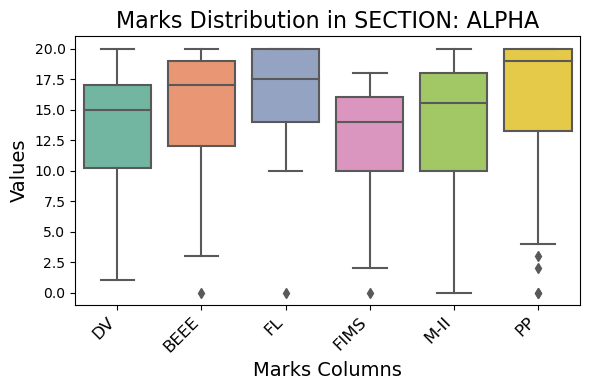

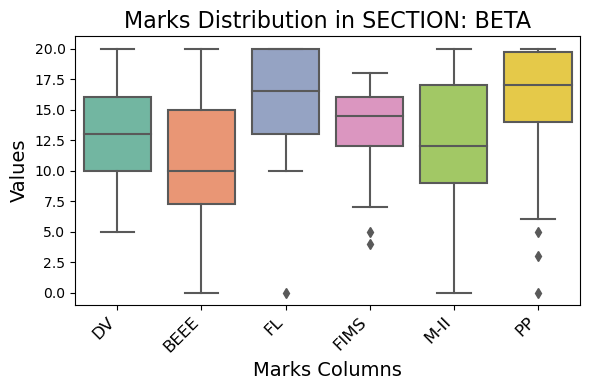

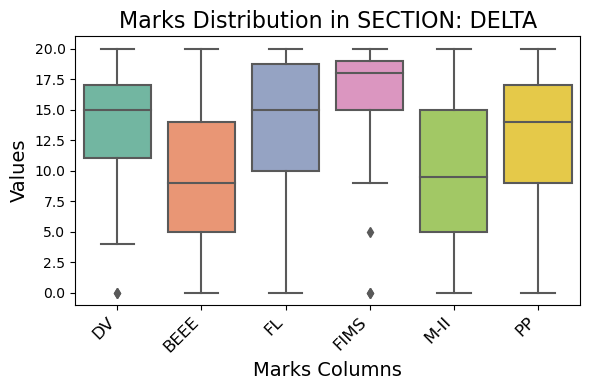

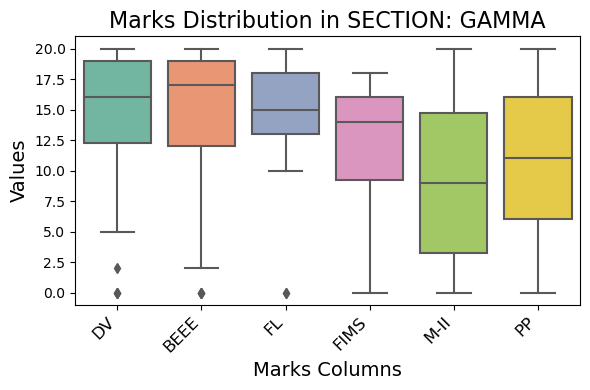

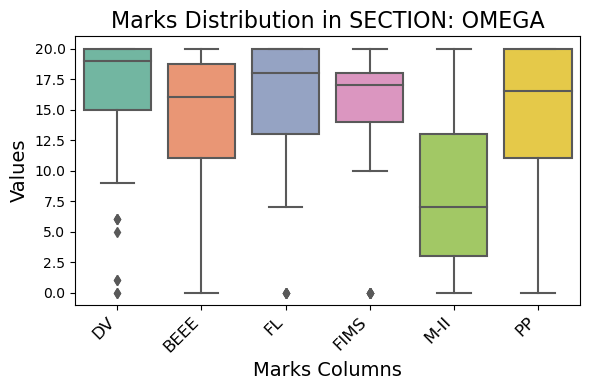

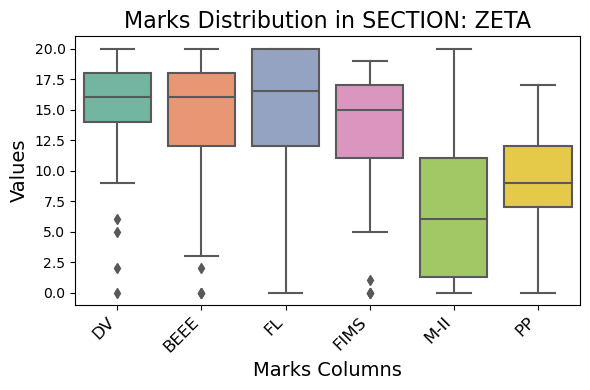

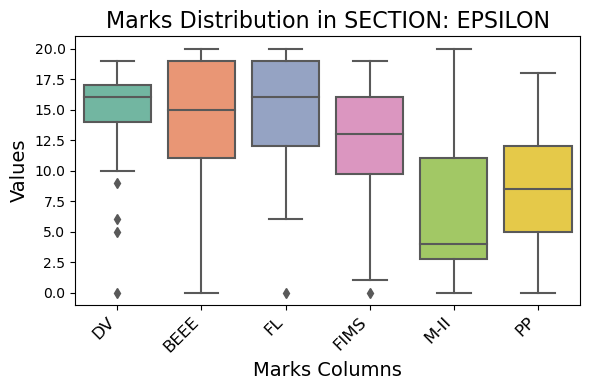

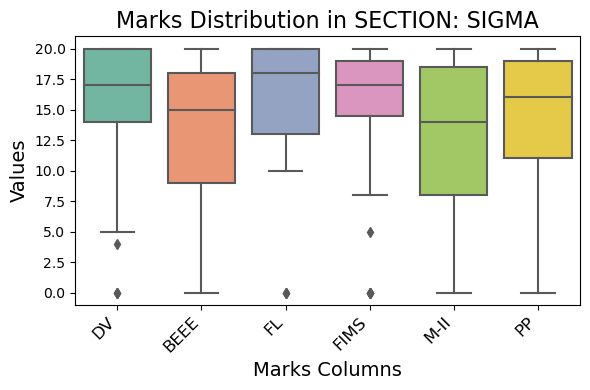

In [18]:
sections = ['ALPHA', 'BETA', 'DELTA', 'GAMMA', 'OMEGA', 'ZETA', 'EPSILON', 'SIGMA']
marks_columns = ['DV', 'BEEE', 'FL', 'FIMS', 'M-II', 'PP']



for section in sections:
    plt.figure(figsize=(6,4))
    section_data = df[df['SECTION'] == section]
    sns.boxplot(data=section_data[marks_columns], palette='Set2')
    plt.title(f'Marks Distribution in SECTION: {section}', fontsize=16)
    plt.xlabel('Marks Columns', fontsize=14)
    plt.ylabel('Values', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.tight_layout()
    plt.show()



#### Marks distribution in section: ALPHA ,BETA
#### Outliers appear in PP,FIMS,etc. this might indicate that a alpha students had an exceptionally low or high performance on that subject compared to the rest.
#### PP has more outliers when compared with Rest in Alpha Section

#### Marks distribution in section: GAMMA,Zeta
#### Outliers appear in DV,BEEE,etc. this might indicate that a GAMMA students had an exceptionally low or high performance on that subject compared to the rest.
#### DV has more outliers when compared with Rest in GAMMA Section
#### Marks distribution in section: DELTA
#### Outliers appear in FIMS,DV etc. this might indicate that a delta students had an exceptionally low or high performance on that subject compared to the rest.
#### FIMS has more outliers when compared with Rest in Delta Section
#### Marks distribution in section: EPLSILON
#### Outliers appear in DV,FL etc. this might indicate that a epsilon students had an exceptionally low or high performance on that subject compared to the rest.
#### DV has more outliers when compared with Rest in epsilon Section
#### Marks distribution in section: SIGMA,OMEGA
#### Outliers appear in DV,FIMS,etc. this might indicate that a sigma students had an exceptionally low or high performance on that subject compared to the rest.
#### FIMS , DV has more outliers when compared with Rest in Sigma Section

In [19]:
def pass_or_fail(row, th=10):
    if (row['DV'] >= th and row['BEEE'] >= th and row['FL'] >= th and 
        row['FIMS'] >= th and row['M-II'] >= th and row['PP'] >= th):
        return 'Pass'
    else:
        return 'Fail'

df['Pass_Fail'] = df.apply(lambda row: pass_or_fail(row), axis=1)

print(df[['SECTION', 'Pass_Fail']])

    SECTION Pass_Fail
0     ALPHA      Fail
1     ALPHA      Fail
2     ALPHA      Pass
3     ALPHA      Fail
4     ALPHA      Pass
..      ...       ...
713    ZETA      Fail
714    ZETA      Fail
715    ZETA      Fail
716    ZETA      Fail
717    ZETA      Pass

[691 rows x 2 columns]


#### Creating a Pass_Fail columns applying  condition by comparing each subject values with predefined threshold value

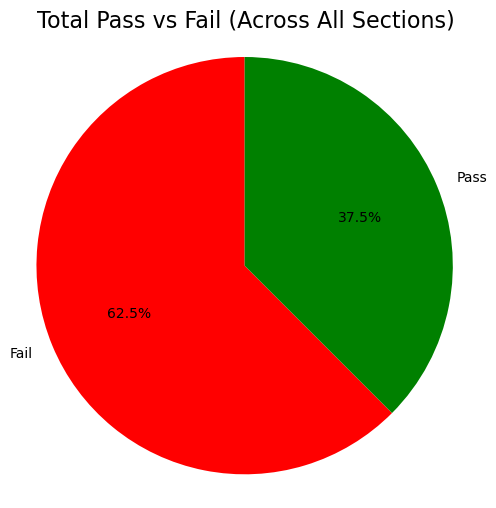

In [20]:
total_pass_fail_counts = df['Pass_Fail'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(total_pass_fail_counts, labels=total_pass_fail_counts.index, autopct='%1.1f%%', startangle=90, colors=['Red', 'Green'])
plt.title('Total Pass vs Fail (Across All Sections)', fontsize=16)
plt.axis('equal')
plt.show()

#### Above Pie Chart indicates the Fail percentage (62.5%) is high in the mid. for all sections.

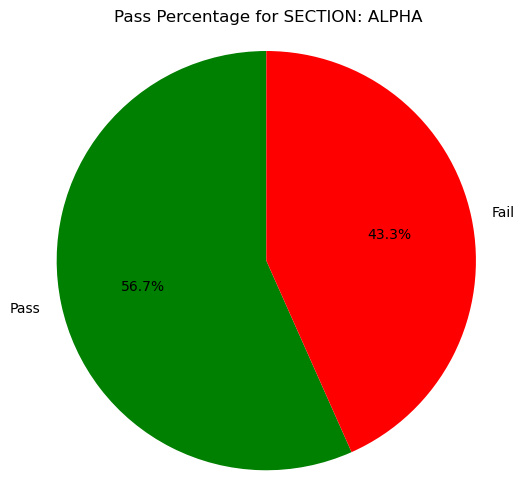

In [21]:
alpha= df[df['SECTION'] == 'ALPHA']
pass_fail_counts = alpha['Pass_Fail'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(pass_fail_counts, labels=pass_fail_counts.index, autopct='%1.1f%%', startangle=90, colors=['Green', 'Red'])
plt.title('Pass Percentage for SECTION: ALPHA')
plt.axis('equal') 
plt.show()

### Section: Alpha has the pass percentage of 56.7% and fail percentage of 43.3%

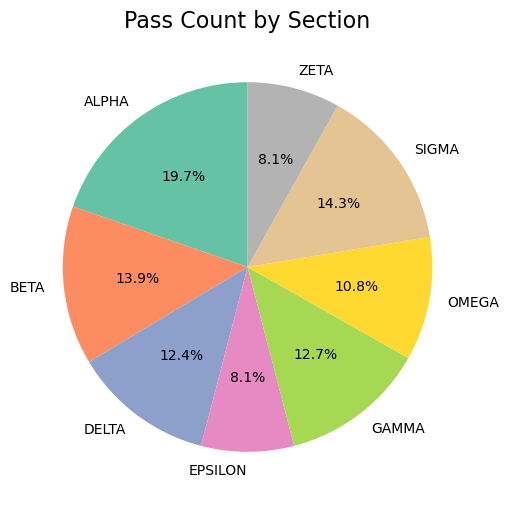

In [22]:
pass_counts = df[df['Pass_Fail'] == 'Pass'].groupby('SECTION').size()
plt.figure(figsize=(6,6))
palette=sns.color_palette('Set2')
plt.pie(pass_counts, labels=pass_counts.index, autopct='%1.1f%%', startangle=90, colors=palette)
plt.title('Pass Count by Section', fontsize=16)
plt.show()

### Above Pie chart represents the Pass count of the student by section.
### ALPHA, SIGMA and BETA has highest students pass count in mid.
### EPSILON and ZETA has least students pass count in mid.

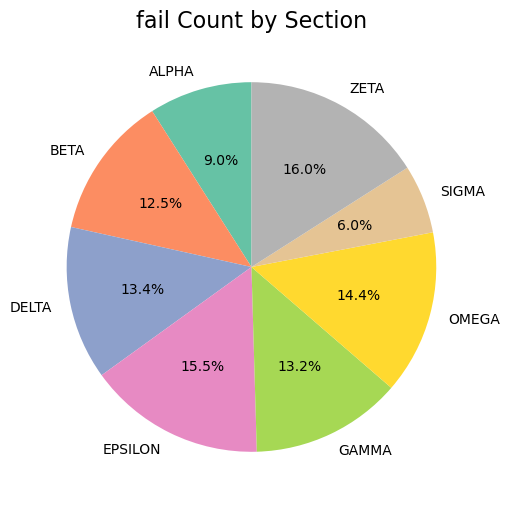

In [23]:
fail_counts = df[df['Pass_Fail'] == 'Fail'].groupby('SECTION').size()
plt.figure(figsize=(6,6))
palette=sns.color_palette('Set2')
plt.pie(fail_counts, labels=fail_counts.index, autopct='%1.1f%%', startangle=90,colors=palette)
plt.title('fail Count by Section', fontsize=16)
plt.show()

### Above Pie chart represents the Fail count of the student by section.
### EPSILON and ZETA has highest students fail count in mid.
### SIGMA,ALPHA and BETA has least students fail count in mid.


In [24]:
def backlog(row, th=10):
    subjects = ['DV', 'BEEE', 'FL', 'FIMS', 'M-II', 'PP']
    count=0;
    for i in range(len(subjects)):
        if(row[subjects[i]]<th):
            count+=1
    return count
df['Backlog'] = df.apply(lambda row: backlog(row), axis=1)
print(df)

     S.NO SECTION  DV  M-II  PP  BEEE  FL  FIMS  Total Pass_Fail  Backlog
0     1.0   ALPHA  12     0  17     9  19    15     72      Fail        2
1     2.0   ALPHA  19    12  16    16  18     3     84      Fail        1
2     3.0   ALPHA  18    14  18    18  18    16    102      Pass        0
3     4.0   ALPHA  15     9  19    17  19    15     94      Fail        1
4     5.0   ALPHA  18    17  19    19  20    18    111      Pass        0
..    ...     ...  ..   ...  ..   ...  ..   ...    ...       ...      ...
713   NaN    ZETA  19     8   8    19  17    18     89      Fail        2
714   NaN    ZETA  12     1   7    10  20     8     58      Fail        3
715   NaN    ZETA  17     6  14    14  17    18     86      Fail        1
716   NaN    ZETA  12     1   6     7  15    12     53      Fail        3
717   NaN    ZETA  19    14  17    16  20    19    105      Pass        0

[691 rows x 11 columns]


0    259
1    166
2    117
3     68
4     43
5     22
6     16
Name: Backlog, dtype: int64


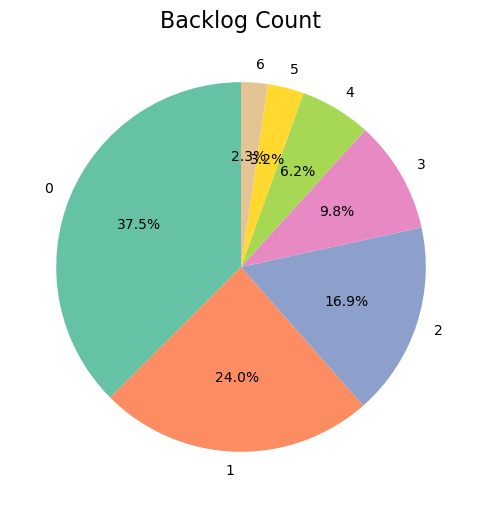

In [25]:
backlog_count=df.Backlog.value_counts()
print(backlog_count)
plt.figure(figsize=(6,6))
palette=sns.color_palette('Set2')
plt.pie(backlog_count, labels=backlog_count.index, autopct='%1.1f%%', startangle=90, colors=palette)
plt.title('Backlog Count', fontsize=16)
plt.show()

In [26]:
subjects = ['DV', 'BEEE', 'FL', 'FIMS', 'M-II', 'PP']
backlog_per_subject = {subject: (df[subject] < 10).sum() for subject in subjects}
print("Backlogs count per subject:")
for subject, count in backlog_per_subject.items():
    print(f"{subject}: {count}")


Backlogs count per subject:
DV: 87
BEEE: 185
FL: 43
FIMS: 117
M-II: 339
PP: 211


In [27]:
dv_backlog_students = df[(df['DV'] < 10) & (df['SECTION'] == 'ALPHA')]
print(dv_backlog_students)

    S.NO SECTION  DV  M-II  PP  BEEE  FL  FIMS  Total Pass_Fail  Backlog
20  21.0   ALPHA   4     2   5     3  16     9     39      Fail        5
25  26.0   ALPHA   6    10  10    11  13    10     60      Fail        1
27  28.0   ALPHA   5     4   3    12  13     5     42      Fail        4
29  30.0   ALPHA   8     2  11    10  13    12     56      Fail        2
35  36.0   ALPHA   8    13  13    12  14     7     67      Fail        2
50  51.0   ALPHA   1    16  15    13  10    11     66      Fail        1
51  52.0   ALPHA   6    12  10    11  10     3     52      Fail        2
53  54.0   ALPHA   8    13   9    11  10    10     61      Fail        2
57  58.0   ALPHA   2     2   4    10  10     3     31      Fail        4
61  62.0   ALPHA   8     8  15     9  10     9     59      Fail        4
65  66.0   ALPHA   9    13   8    15  10    11     66      Fail        2
70  71.0   ALPHA   4     2  16    10  15     9     56      Fail        3
72  73.0   ALPHA   7     0  15    10  18    11     

In [28]:
threshold = 10
backlog_mask = df[subjects] < threshold
df['Backlog2'] = backlog_mask.sum(axis=1)
print(df)


     S.NO SECTION  DV  M-II  PP  BEEE  FL  FIMS  Total Pass_Fail  Backlog  \
0     1.0   ALPHA  12     0  17     9  19    15     72      Fail        2   
1     2.0   ALPHA  19    12  16    16  18     3     84      Fail        1   
2     3.0   ALPHA  18    14  18    18  18    16    102      Pass        0   
3     4.0   ALPHA  15     9  19    17  19    15     94      Fail        1   
4     5.0   ALPHA  18    17  19    19  20    18    111      Pass        0   
..    ...     ...  ..   ...  ..   ...  ..   ...    ...       ...      ...   
713   NaN    ZETA  19     8   8    19  17    18     89      Fail        2   
714   NaN    ZETA  12     1   7    10  20     8     58      Fail        3   
715   NaN    ZETA  17     6  14    14  17    18     86      Fail        1   
716   NaN    ZETA  12     1   6     7  15    12     53      Fail        3   
717   NaN    ZETA  19    14  17    16  20    19    105      Pass        0   

     Backlog2  
0           2  
1           1  
2           0  
3          

In [29]:
def Performance(df):
    if(df.PP >=18 and df.PP<=20):
        return 'Very Good'
    elif (df.PP>=15 and  df.PP<18):
        return 'Good'
    elif (df.PP>=12 and df.PP<15):
        return 'Average'
    else:
        return 'Poor'

In [30]:
df['Performance']=df.apply(Performance, axis = 1)

In [31]:
df['Performance']

0           Good
1           Good
2      Very Good
3      Very Good
4      Very Good
         ...    
713         Poor
714         Poor
715      Average
716         Poor
717         Good
Name: Performance, Length: 691, dtype: object

Poor         279
Very Good    192
Good         116
Average      104
Name: Performance, dtype: int64


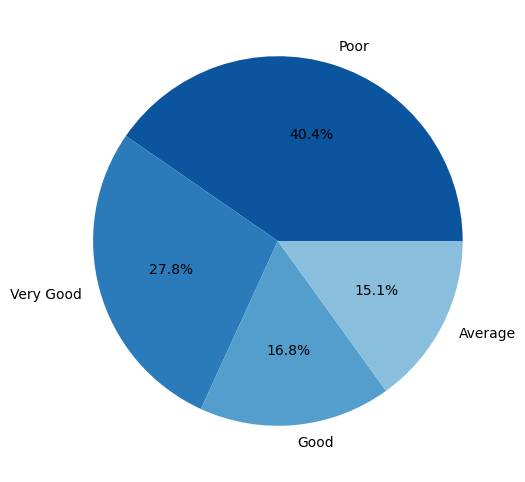

In [32]:
performance_count=df['Performance'].value_counts()
print(performance_count)
plt.figure(figsize=(8,6))
plt.pie(
    performance_count,
    labels=performance_count.index,
    autopct="%1.1f%%"
    )

plt.show()

In [33]:
def Performance_DV(df):
    if(df.DV >=18 and df.DV<=20):
        return 'Very Good'
    elif (df.DV>=15 and  df.DV<18):
        return 'Good'
    elif (df.DV>=12 and df.DV<15):
        return 'Average'
    else:
        return 'Poor'

In [34]:
df['Performance_DV']=df.apply(Performance_DV, axis = 1)

Very Good    218
Good         210
Poor         154
Average      109
Name: Performance_DV, dtype: int64


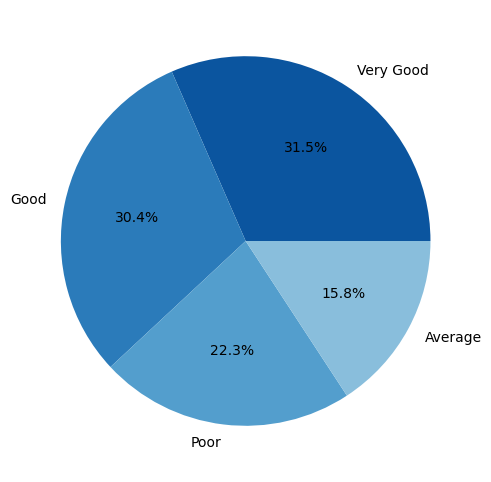

In [35]:
performance_count_dv=df['Performance_DV'].value_counts()
print(performance_count_dv)
plt.figure(figsize=(8,6))
plt.pie(
    performance_count_dv,
    labels=performance_count_dv.index,
    autopct="%1.1f%%"
    )
plt.show()

In [36]:
def Status(df):
    if(df.DV==20 or df.PP==20 or df.FIMS==20 or  df.FL==20 or df.FL==20 or df.BEEE==20 or df['M-II']==20):
        return True
    else :
        return False

In [37]:
df['Status']=df.apply(Status, axis = 1)
df['Status'].value_counts()

False    404
True     287
Name: Status, dtype: int64